# Data Science Job Salaries Dataset

Data science jobs are some of the fastest-growing, most in-demand in technology. 
Since 2012, Data Scientist roles have increased by 650 percent, and this rise shows no sign of stopping. 
The U.S. Bureau of Labor Statistics predicts that the demand for data science skills will increase another 27.9 percent 
by 2026. And, according to a report from McKinsey, that spells a shortage of between 140,000 and 190,000 people 
with analytical skills in the U.S. alone—not to mention another 1.5 million managers and analysts who will be
required to understand how data analysis drives decision-making.

Data Scientist salaries have also risen with demand; Data Scientists can typically expect to make six figures. 
Demand also translates into an ability to relocate far more easily—from city to city, and even internationally.




### Feature Description
- work_year - The year the salary was paid
- experience_level - The experience level in the job during the year with the following possible values: 
    - EN Entry-level
    - Junior MI Mid-level
    - Intermediate SE Senior-level
    - Expert EX Executive-level
    - Director
- employment_type - The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
- job_title - The role worked in during the year
- salary - The total gross salary amount paid.
- salary_currency - The currency of the salary paid as an ISO 4217 currency code.
- salary_in_usd - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)
- employee_residence - Employee's primary country of residence in during the work year as an ISO 3166 country code
- remote_ratio - The overall amount of work done remotely, possible values are as follows:
    - 0 No remote work (less than 20%)
    - 50 Partially remote 
    - 100 Fully remote (more than 80%)
- company_location - The country of the employer's main office or contracting branch as an ISO 3166 country code
- company_size - The average number of people that worked for the company during the year:
    - S less than 50 employees (small) 
    - M 50 to 250 employees (medium) 
    - L more than 250 employees (large)
    
### Goal of the notebook:
1. Explore every feature in the dataset
2. Work Year Analysis(with Salary, Remote Ratio)
3. Experience Level Analysis (with Employment Type, Top 3 Job Title, Company Size)
4. Company Location Analysis (with Experience Level)
5. Salary Analysis (with Work Year, Experience Level, Company Size, Job Title, Remote Ratio)


In [11]:
# IMPORT DATA ANALYSIS LIBRARIES
# import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# IMPORT VISUALIZATION LIBRARIES
# import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px
!pip install country-converter
import country_converter as coco

In [2]:
# load the data
#url = "https://github.com/koges/10Alytics_DataScience_JobSalaries/blob/main/ds_salaries.csv"
filepath = r"C:\Users\OOGE\OneDrive - Equinor\python\10Alytics_Python\Internship\Task 1_08012023\Data Scientist Salaries - EDA\ds_salaries.csv"
df = pd.read_csv(filepath, index_col=0)

In [3]:
# View first 5 rows of data
df.head()

work_year experience_level employment_type                   job_title  \
0       2020               MI              FT              Data Scientist   
1       2020               SE              FT  Machine Learning Scientist   
2       2020               SE              FT           Big Data Engineer   
3       2020               MI              FT        Product Data Analyst   
4       2020               SE              FT   Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   70000             EUR          79833                 DE             0   
1  260000             USD         260000                 JP             0   
2   85000             GBP         109024                 GB            50   
3   20000             USD          20000                 HN             0   
4  150000             USD         150000                 US            50   

  company_location company_size  
0               DE            L  
1               JP            S  
2               GB            M  
3               HN            S  
4               US            L

In [4]:
# Get data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [8]:
# TRANSPOSE THE DESCRIPTIVE STATISTICS
df.describe(include='all').T

count unique             top freq           mean  \
work_year           607.0    NaN             NaN  NaN    2021.405272   
experience_level      607      4              SE  280            NaN   
employment_type       607      4              FT  588            NaN   
job_title             607     50  Data Scientist  143            NaN   
salary              607.0    NaN             NaN  NaN  324000.062603   
salary_currency       607     17             USD  398            NaN   
salary_in_usd       607.0    NaN             NaN  NaN  112297.869852   
employee_residence    607     57              US  332            NaN   
remote_ratio        607.0    NaN             NaN  NaN       70.92257   
company_location      607     50              US  355            NaN   
company_size          607      3               M  326            NaN   

                               std     min      25%       50%       75%  \
work_year                 0.692133  2020.0   2021.0    2022.0    2022.0   
experience_level               NaN     NaN      NaN       NaN       NaN   
employment_type                NaN     NaN      NaN       NaN       NaN   
job_title                      NaN     NaN      NaN       NaN       NaN   
salary              1544357.486636  4000.0  70000.0  115000.0  165000.0   
salary_currency                NaN     NaN      NaN       NaN       NaN   
salary_in_usd         70957.259411  2859.0  62726.0  101570.0  150000.0   
employee_residence             NaN     NaN      NaN       NaN       NaN   
remote_ratio              40.70913     0.0     50.0     100.0     100.0   
company_location               NaN     NaN      NaN       NaN       NaN   
company_size                   NaN     NaN      NaN       NaN       NaN   

                           max  
work_year               2022.0  
experience_level           NaN  
employment_type            NaN  
job_title                  NaN  
salary              30400000.0  
salary_currency            NaN  
salary_in_usd         600000.0  
employee_residence         NaN  
remote_ratio             100.0  
company_location           NaN  
company_size               NaN

### Descriptive Statistics

* `work_year:` The work year ranges from 2020 to 2022.
* `experience_level:` There are 4 unique experience levels and Intermediate SE Senior level has the highest occurence with 280 counts.
* `employment_type:` There are 4 unique employment types and Full-time (FT) employment is the most common with 588 counts.
* `job_title:` There are 50 unique job titles and Data Scientist is the most dominant amongst them with a count of 143.
* `salary:` The salary range of data professionals is from 4000 to 30400000 with an average salary of 324000.
    There is a wide range of salary due to variation in currencies in which salaries are quoted.
    The average gross salary of a data professional is 324000. 
    There is a difference between the mean and the 50th percentile (i.e median) with the median about half the value of the mean. 
    This means that there outliers of extremely high values that cause the mean to be high as well.
* `salary_currency:` The salries are quoted in 17 different currencies and USD is the most common.
* `salary_in_usd:` The salary in usd ranges from 2859 to 600000 with an average of approximately 112298 and a median of 101570. 
    The difference between the mean and median can be attributed to outliers of high values being present.
* `employee_residence:` There are 57 countries of residence for the data professionals and US is the most popular amongst the residences.
* `remote_ratio:`   
* `company_location:` The companies where the data professionals work are spread among 50 different countries of which the US is the most popular country
* `company_size:` There are 3 different company sizes and medium-sized companies are most common.

In [6]:
# Get the shape of the dataset
nrows, ncol = df.shape
print(f'There are {nrows} rows and {ncol} columns')

There are 607 rows and 11 columns


In [7]:
# CHECK FOR MISSING VALUES
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<AxesSubplot: title={'center': 'Missing Data'}>

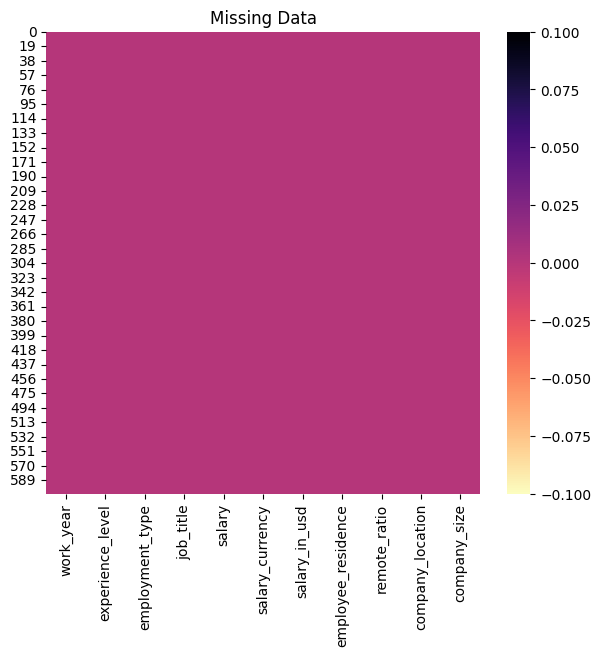

In [21]:
# visualise the missing data
plt.figure(figsize=(7,6))
plt.title('Missing Data')
sns.heatmap(df.isnull(),cbar=True, cmap='magma_r')

`There are 607 rows and 11 columns of data present and there are no null values present. There are 4 numerical columns and 7 object columns.`

## EDA

### 1. Univariate Analysis
1. Categorical Columns
    - Experience Level
    - Job Titles
    - Employment Type
    - Employee Residence & Company Location
    - Company Size
    
2. Numerical Columnns
    - Work Year
    - Salary in USD
    - Remote Ratio

### 1a. Univariate Analysis - Categorical Columns

### Experience Level

In [9]:
# Find unique Experience Level
df.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [20]:
#Relabel the unoque values in Experience level
df.experience_level.replace({'MI':'Junior/Mid','SE':'Intermediate/Senior','EN':'Entry','EX': 'Expert/Executive'},inplace=True)

#df =df.experience_level.replace(['MI'], 'Junior/Mid')
#df =df.experience_level.replace(['SE'], 'Intermediate/Senior')
#df =df.experience_level.replace(['EN'], 'Entry')
#df =df.experience_level.replace(['EX'], 'Expert/Executive')

<AxesSubplot: >

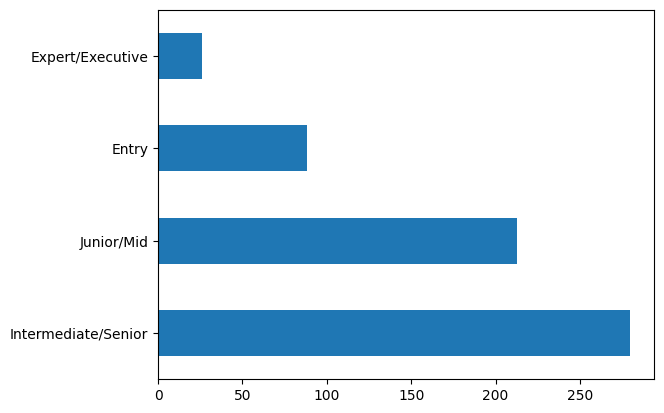

In [21]:
df.experience_level.value_counts().plot.barh()

 * There is an increasing number of data professionals from Expert/Executive, 
    Entry, Junior/Mid to Intermediate /Senior as the higheest.

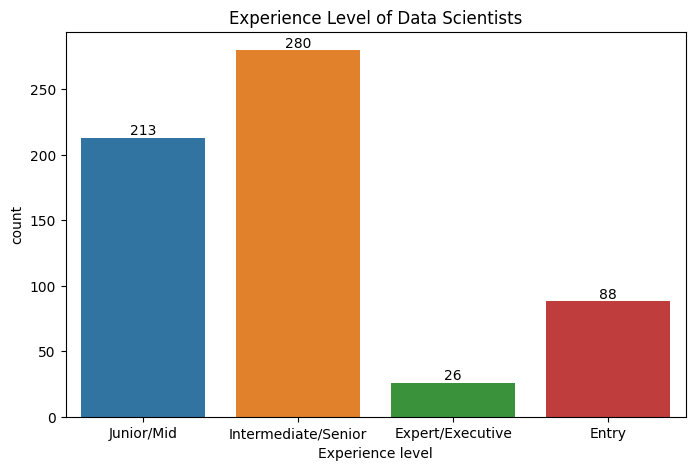

In [22]:
plt.figure(figsize=(8,5))
plt.title('Experience Level of Data Scientists')
ax = sns.countplot(x='experience_level', data=df.sort_values('experience_level',  ascending=False))
for i in ax.containers:
    ax.bar_label(i,)
    plt.xlabel('Experience level')
plt.show()

* Most of the data professionals work at Intermediate/Senior level while the Expert/Executive levels have the least professionals.

### Job Titles

In [23]:
# Job Titles
df.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

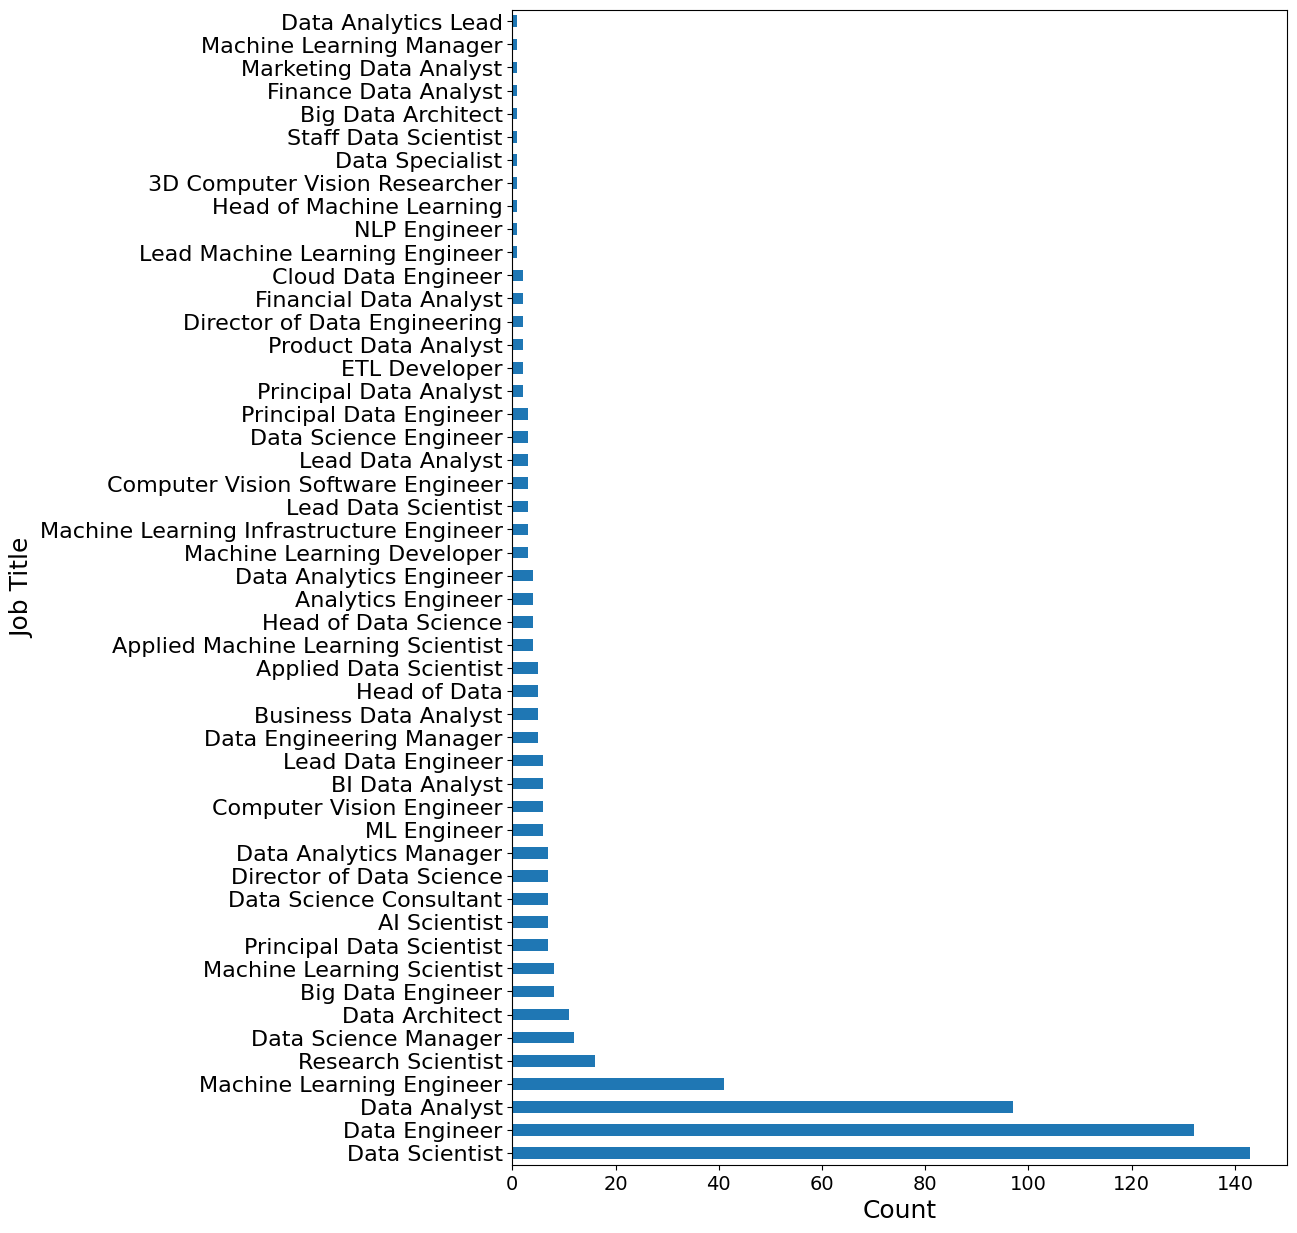

In [15]:
plt.figure(figsize=(10, 15))
df.job_title.value_counts().plot.barh()
ax = plt.gca()
plt.xlabel("Count", fontsize=18)
plt.ylabel("Job Title", fontsize=18)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=14)

* The top 5 job titles from highest to lowest are
    - Data Scientist
    - Data Engineer
    - Data Analyst
    - Machine Learning Engineer
    - Research Scientist


In [25]:
job_title_class = {
'Data Scientist':'Data Scientist',
'Data Engineer':'Data Engineer',
'Data Analyst':'Data Analyst',
'Machine Learning Engineer':'Machine Learning Engineer',
'Research Scientist':'Researcher',
'Data Science Manager': 'Data Scientist',
'Data Architect':'Data Architect',
'Big Data Engineer':'Data Engineer',
'Machine Learning Scientist':'Machine Learning Scientist',
'Principal Data Scientist':'Data Scientist',
'AI Scientist':'AI Scientist',  
'Data Science Consultant':'Data Scientist',
'Director of Data Science':'Data Scientist',
'Data Analytics Manager':'Data Analyst',
'ML Engineer':'Machine Learning Engineer',
'Computer Vision Engineer':'AI Engineer',
'BI Data Analyst':'Data Analyst',      
'Lead Data Engineer':'Data Engineer',
'Data Engineering Manager':'Data Engineer',
'Business Data Analyst':'Data Analyst',
'Head of Data':'Data Scientist',
'Applied Data Scientist':'Data Scientist',
'Applied Machine Learning Scientist':'Machine Learning Scientist',
'Head of Data Science':'Data Scientist',
'Analytics Engineer':'Data Engineer',
'Data Analytics Engineer':'Data Engineer',
'Machine Learning Developer': 'Machine Learning Engineer',
'Machine Learning Infrastructure Engineer':'Machine Learning Engineer',
'Lead Data Scientist':'Data Scientist',
'Computer Vision Software Engineer':'AI Engineer',
'Lead Data Analyst':'Data Analyst',
'Data Science Engineer':'Data Engineer',
'Principal Data Engineer':'Data Engineer',
'Principal Data Analyst':'Data Analyst',
'ETL Developer': 'Data Engineer',
'Product Data Analyst':'Data Analyst',                 
'Director of Data Engineering':'Data Engineer',
'Financial Data Analyst': 'Data Analyst',
'Cloud Data Engineer': 'Data Engineer',
'Lead Machine Learning Engineer':'Machine Learning Engineer',
'NLP Engineer': 'Machine Learning Engineer',
'Head of Machine Learning':'Machine Learning Scientist',
'3D Computer Vision Researcher': 'Researcher',
'Data Specialist':'Data Scientist',
'Staff Data Scientist':'Data Scientist',
'Big Data Architect':'Data Architect',
'Finance Data Analyst': 'Data Analyst',
'Marketing Data Analyst': 'Data Analyst',
'Machine Learning Manager':'Machine Learning Scientist',
'Data Analytics Lead': 'Data Analyst'
}
#df.job_title = df.job_title.map(job_title_class)

In [26]:
# df.job_title.unique()

In [ ]:
# df.job_title.value_counts().plot.barh()

In [ ]:
# df.job_title.value_counts()

### Employment Type

In [27]:
# Employment Type
df.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [29]:
df.employment_type.replace({'FT':'Full-time','CT':'Contract','PT':'Part-time','FL': 'Freelance'},inplace=True)

#df =df.replace(['FT'], 'Full-time')
#df =df.replace(['CT'], 'Contract')
#df =df.replace(['PT'], 'Part-time')
#df =df.replace(['FL'], 'Freelance')

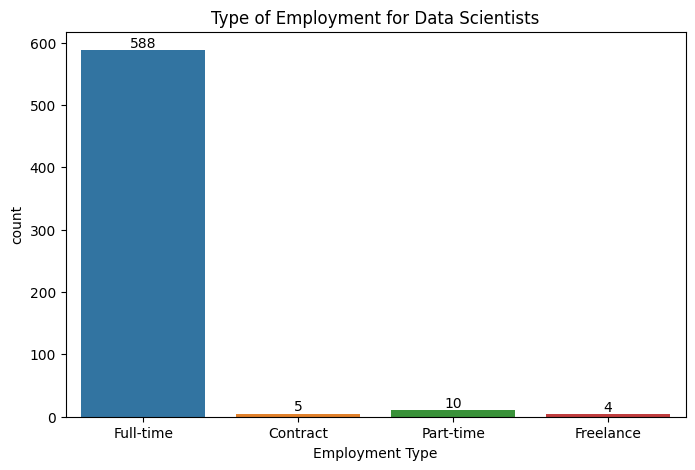

In [30]:
plt.figure(figsize=(8,5))
plt.title('Type of Employment for Data Scientists')
ax = sns.countplot(x='employment_type', data=df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Employment Type')
plt.show()

* Most of the data professional work full-time.

### Employee Residence and Company Location

#### Employee Residence

In [31]:
# Get Unique Employee Residence
df.employee_residence.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

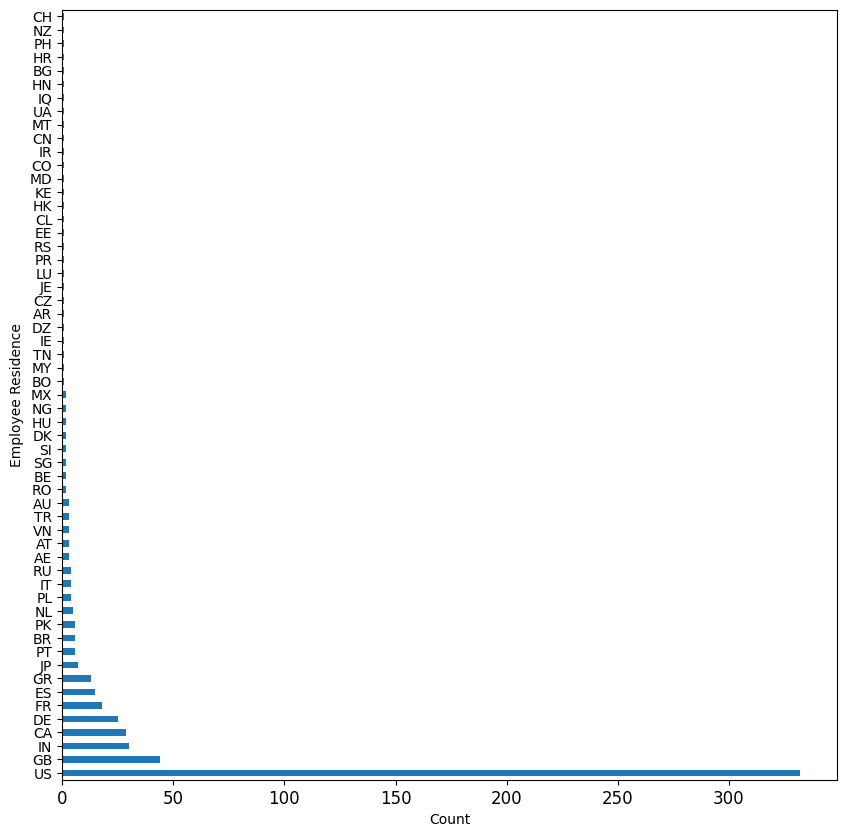

In [26]:
plt.figure(figsize=(10, 10))
df.employee_residence.value_counts().plot.barh()
ax = plt.gca()
plt.xlabel("Count", fontsize=10)
plt.ylabel("Employee Residence", fontsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelsize=12)

In [27]:
df.employee_residence.value_counts()

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

* The top 3 Residence Countries for data professionals are US, GB and IN in decreasing order

#### Company Location

In [32]:
# Get Unique Company Locations
df.company_location.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [33]:
df.company_location.value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

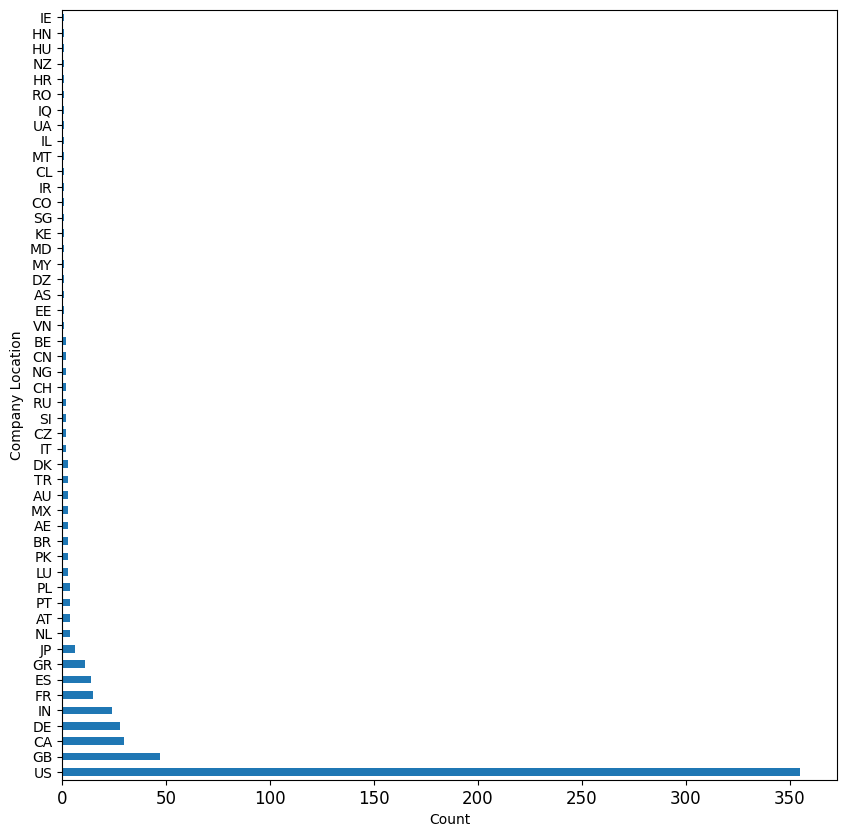

In [34]:
plt.figure(figsize=(10, 10))
df.company_location.value_counts().plot.barh()
ax = plt.gca()
plt.xlabel("Count", fontsize=10)
plt.ylabel("Company Location", fontsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelsize=12)

* The top 3 Company Locations for data professionals are US, GB and CA in decreasing order

In [ ]:
# create a dataframe of differing employee vs company location
# make a bar chart of employee location color-coded by company location

In [35]:
employee_residence_name = coco.convert(names=df.employee_residence, to="ISO3")
company_location_name = coco.convert(names=df.company_location, to="ISO3")
df.employee_residence = employee_residence_name
df.company_location = company_location_name
print(f'This is the list of employee residence: ') 
print(df.employee_residence.unique())
print(f'This is the list of company location: ')
print(df.company_location.unique())

This is the list of employee residence: 
['DEU' 'JPN' 'GBR' 'HND' 'USA' 'HUN' 'NZL' 'FRA' 'IND' 'PAK' 'POL' 'PRT'
 'CHN' 'GRC' 'ARE' 'NLD' 'MEX' 'CAN' 'AUT' 'NGA' 'PHL' 'ESP' 'DNK' 'RUS'
 'ITA' 'HRV' 'BGR' 'SGP' 'BRA' 'IRQ' 'VNM' 'BEL' 'UKR' 'MLT' 'CHL' 'ROU'
 'IRN' 'COL' 'MDA' 'KEN' 'SVN' 'HKG' 'TUR' 'SRB' 'PRI' 'LUX' 'JEY' 'CZE'
 'ARG' 'DZA' 'TUN' 'MYS' 'EST' 'AUS' 'BOL' 'IRL' 'CHE']
This is the list of company location: 
['DEU' 'JPN' 'GBR' 'HND' 'USA' 'HUN' 'NZL' 'FRA' 'IND' 'PAK' 'CHN' 'GRC'
 'ARE' 'NLD' 'MEX' 'CAN' 'AUT' 'NGA' 'ESP' 'PRT' 'DNK' 'ITA' 'HRV' 'LUX'
 'POL' 'SGP' 'ROU' 'IRQ' 'BRA' 'BEL' 'UKR' 'ISR' 'RUS' 'MLT' 'CHL' 'IRN'
 'COL' 'MDA' 'KEN' 'SVN' 'CHE' 'VNM' 'ASM' 'TUR' 'CZE' 'DZA' 'EST' 'MYS'
 'AUS' 'IRL']


In [36]:
fig = px.choropleth(df, locations="employee_residence",
                    color="company_location",
                    color_continuous_scale=px.colors.sequential.RdBu,
                    template='plotly_dark')
                #color_continuous_scale=px.colors.sequential.PuRd)
fig["layout"].pop("updatemenus")
fig.show()

<Figure size 1000x1000 with 0 Axes>

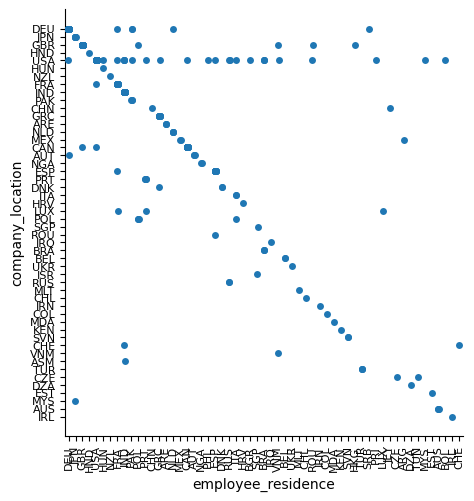

In [34]:
plt.figure(figsize=(10, 10))
a=sns.catplot(x='employee_residence', y="company_location", data=df, kind="strip", jitter=True)
a.set_xticklabels(fontsize=8)
a.set_yticklabels(fontsize=8)
a.set_xticklabels(rotation=90)
plt.show()

* Countries where employee residence differs from company location are seen as scattered points in the chart above.

### Company Size

In [39]:
df.company_size.unique()

array(['Large', 'Small', 'Medium'], dtype=object)

In [40]:
df.company_size.replace({'L':'Large','S':'Small','M':'Medium'},inplace=True)

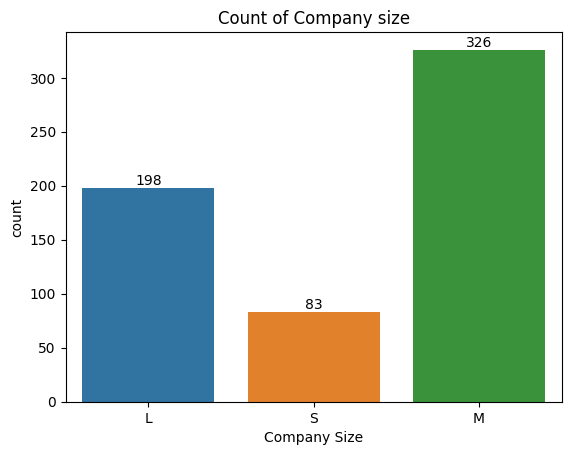

In [37]:
plt.title('Count of Company size')
ax = sns.countplot(x='company_size', data=df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Company Size')
plt.show()

* Medium-sized companies are more common followed by Large while the least are small-sized companies

### 1b. Univariate Analysis - Numerical Columns

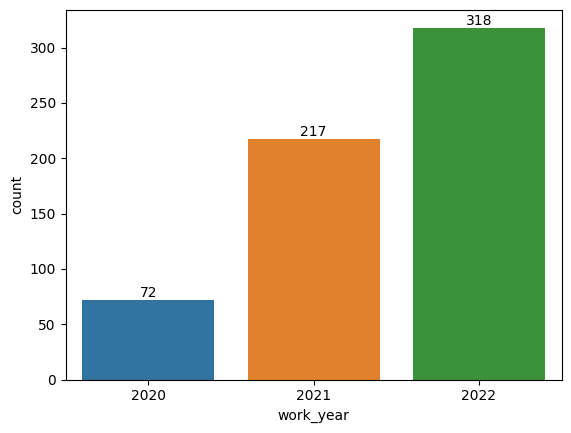

In [42]:
# Work Year
ax = sns.countplot(x='work_year', data=df)
for i in ax.containers:
    ax.bar_label(i,)

* The number of data professionals increased from 2020 to 2022.

### Salary

<AxesSubplot: xlabel='salary_in_usd', ylabel='Count'>

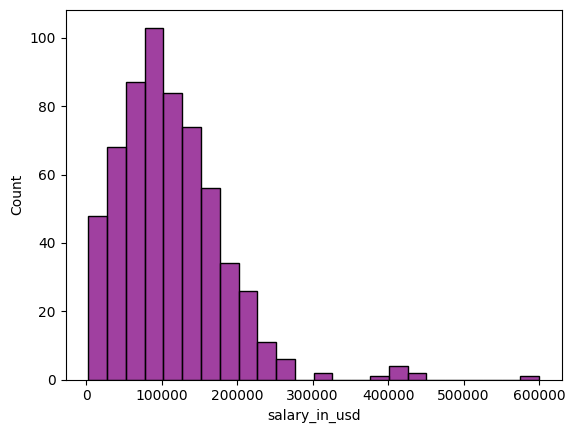

In [43]:
# Salary in USD
sns.histplot(data = df, x='salary_in_usd',bins = 24, color = 'purple')

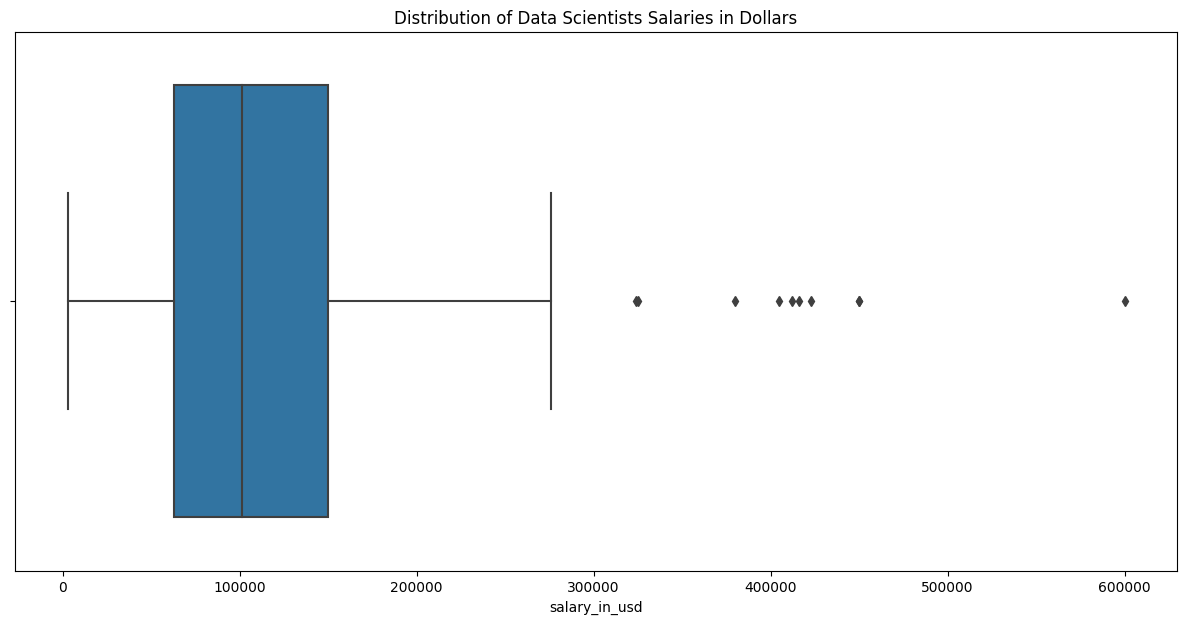

In [38]:
plt.figure(figsize=(15,7))
plt.title('Distribution of Data Scientists Salaries in Dollars') 
plt.xlabel('Salaries of Data Scientists')
sns.boxplot(data=df,x='salary_in_usd')
plt.show()

* Both the histogram and box plots are left-skewed showing the presence of outliers in the data which results in a higher mean value than the median.
* The most common salary range in usd is between 75000 and 100000.

#### Remote Ratio

In [41]:
# Remote Ratio
df.remote_ratio.replace({0:'No remote work',50:'Partially remote',100:'Fully remote'},inplace=True)

In [42]:
df.remote_ratio.unique()

array(['No remote work', 'Partially remote', 'Fully remote'], dtype=object)

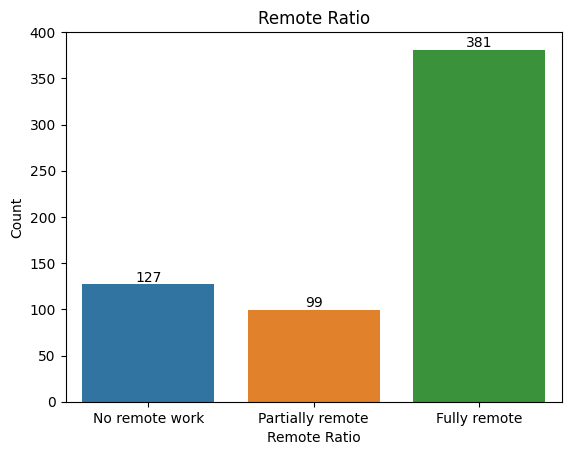

In [44]:
plt.title('Remote Ratio')
ax = sns.countplot(x='remote_ratio', data=df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Remote Ratio')
plt.ylabel('Count')
plt.show()

* Most of the data professionals work fully remote.

## 2. Bivariate Analysis

### 2a. Work Year Analysis
 - Remote Ratio by Work Year

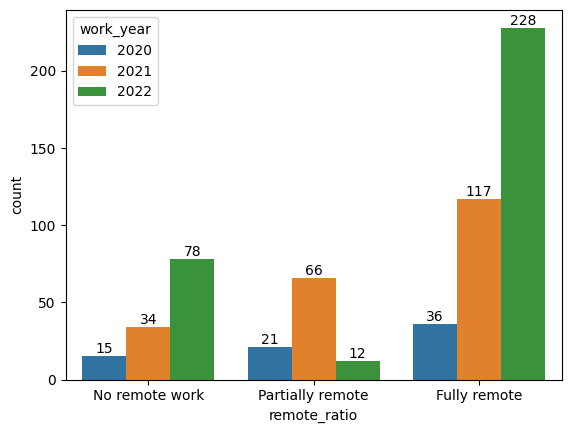

In [47]:
ax = sns.countplot(x='remote_ratio', data=df, hue = 'work_year')
for i in ax.containers:
    ax.bar_label(i,)

* For all the years, fully remote is highest and the remote work became increasingly common from 2020 to 2022.

### 3. Experience Level Analysis

### 3a. Employment Type by Experience level

Text(0, 0.5, 'Count')

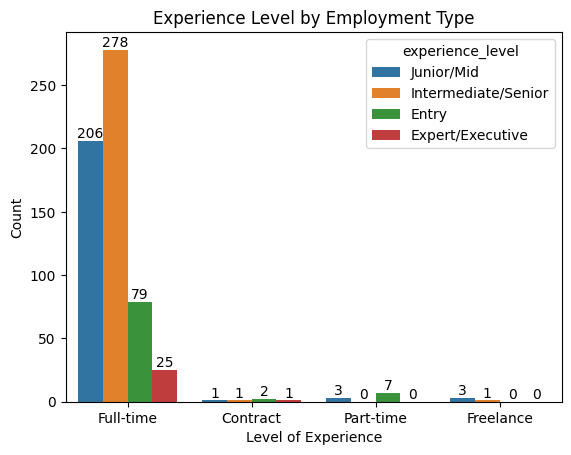

In [46]:
ax = sns.countplot(x='employment_type', data=df, hue = 'experience_level')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Experience Level by Employment Type')
plt.xlabel('Level of Experience')
plt.ylabel('Count')

* Full time employment is most common and intermediate/ senior position is dominant.

### 3b. Top 3 Job Title by Experience Level

In [49]:
# Job Titles
df.job_title.value_counts().head(3)

Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: job_title, dtype: int64

In [50]:
#df.sort_values('job_title', ascending=False).head(3)
#ax = sns.countplot(x='job_title', data=df.nlargest(3, 'job_title'), hue = 'experience_level')
##for i in ax.containers:
#    ax.bar_label(i,)
    
top3_title = df.groupby('experience_level', as_index = False)['job_title'].value_counts()
top3_title = top3_title.sort_values(by='experience_level', ascending = True)
top3_title

experience_level                      job_title  count
0              Entry                 Data Scientist     22
18             Entry        Data Analytics Engineer      1
17             Entry         Financial Data Analyst      1
16             Entry         Applied Data Scientist      1
15             Entry     Machine Learning Developer      1
..               ...                            ...    ...
82        Junior/Mid              Lead Data Analyst      2
83        Junior/Mid                   AI Scientist      2
84        Junior/Mid         Applied Data Scientist      2
86        Junior/Mid                  ETL Developer      2
104       Junior/Mid  3D Computer Vision Researcher      1

[105 rows x 3 columns]

In [51]:
p=pd.crosstab(df.job_title,df.experience_level).sort_values(by='job_title',ascending=False)
p.iloc[[27,32,37],:]

experience_level  Entry  Expert/Executive  Intermediate/Senior  Junior/Mid
job_title                                                                 
Data Scientist       22                 0                   61          60
Data Engineer        12                 4                   63          53
Data Analyst         12                 2                   54          29

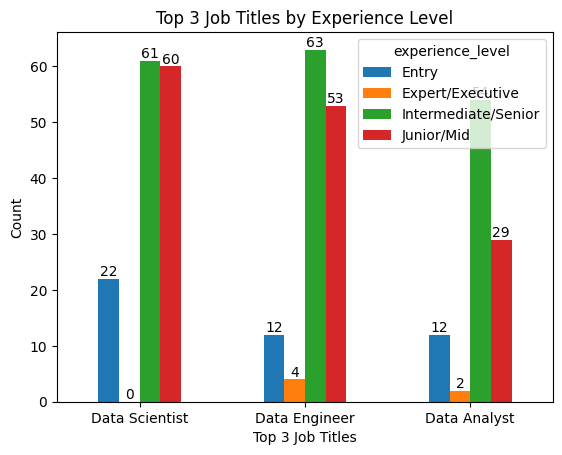

In [55]:
# make composite plot of job titles colored by emp_level
v=p.iloc[[27,32,37],:]
ax=v.plot.bar(stacked=False)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Top 3 Job Titles by Experience Level')
plt.xlabel('Top 3 Job Titles')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

* Intermediate/Senior positions are most common among Data Engineers followed by Data Scientists.
* Junior/ mid level positions are popular amongst data scientists folloed by Data Engineers.

### 3c. Company Size by Experience Level

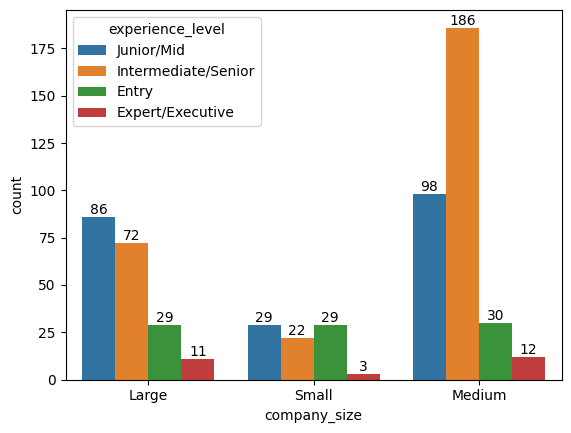

In [69]:
#ax = sns.countplot(y='company_size', data=df, hue = 'experience_level', orient ='h')

ax = sns.countplot(x='company_size', data=df, hue = 'experience_level')
for i in ax.containers:
    ax.bar_label(i,)

* Medium-sized companies have the highest number of data professionals across all experience levels most of which work as intermediate/senior professionals

### 4. Company Location Analysis
 - Experience Level

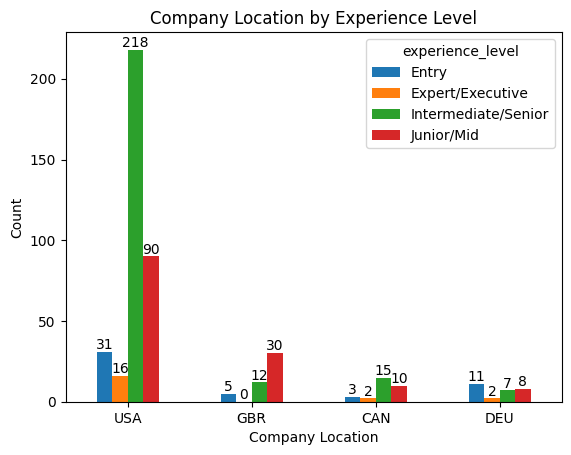

In [57]:
cc=pd.crosstab(df.company_location,df.experience_level).sort_values(by='company_location',ascending=False)
cc.iloc[[1,31,43,37],:]
rr=cc.iloc[[1,31,43,37],:]
ax= rr.plot.bar(stacked=False)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Company Location by Experience Level')
plt.xlabel('Company Location')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

* USA Companies have the most data professionals out of which intermediate/senior levels are the most common

### 5. Salary Analysis

### 5a. Salary by work year

<AxesSubplot: xlabel='work_year', ylabel='AverageSalary_in_usd'>

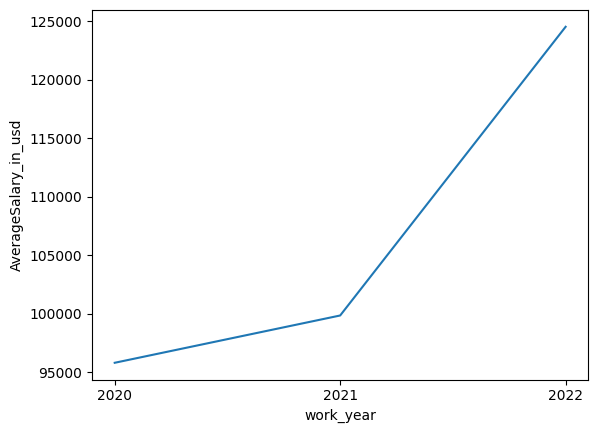

In [58]:
salary_by_workyear= pd.DataFrame(df.groupby('work_year')['salary_in_usd'].mean())

salary_by_workyear = salary_by_workyear.reset_index()

salary_by_workyear.rename(columns = {'salary_in_usd':'AverageSalary_in_usd'}, inplace = True)      
salary_by_workyear.work_year.replace({2020:"2020",2021:"2021",2022:"2022"},inplace=True)

sns.lineplot(x=salary_by_workyear.work_year, y= salary_by_workyear.AverageSalary_in_usd, data = salary_by_workyear)

<AxesSubplot: xlabel='work_year', ylabel='AverageSalary_in_usd'>

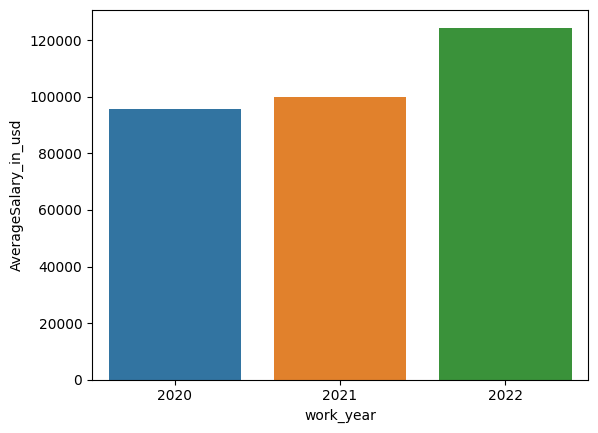

In [59]:
sns.barplot(data= salary_by_workyear, x= 'work_year',y= 'AverageSalary_in_usd')

There is a gradual change in mean salry from 2020 to 2021 while the change is steeper between 2021 and 2022.

### 5b. Salary by Experience Level

<AxesSubplot: xlabel='experience_level', ylabel='AverageSalary_in_usd'>

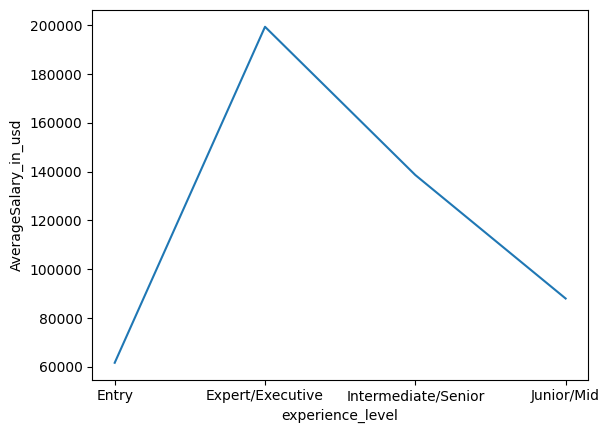

In [60]:
salary_by_experience= pd.DataFrame(df.groupby('experience_level')['salary_in_usd'].mean())

salary_by_experience = salary_by_experience.reset_index()

salary_by_experience.rename(columns = {'salary_in_usd':'AverageSalary_in_usd'}, inplace = True)      
#salary_by_experience.work_year.replace({2020:"2020",2021:"2021",2022:"2022"},inplace=True)

sns.lineplot(x=salary_by_experience.experience_level, y= salary_by_experience.AverageSalary_in_usd, data = salary_by_experience)

<AxesSubplot: xlabel='experience_level', ylabel='AverageSalary_in_usd'>

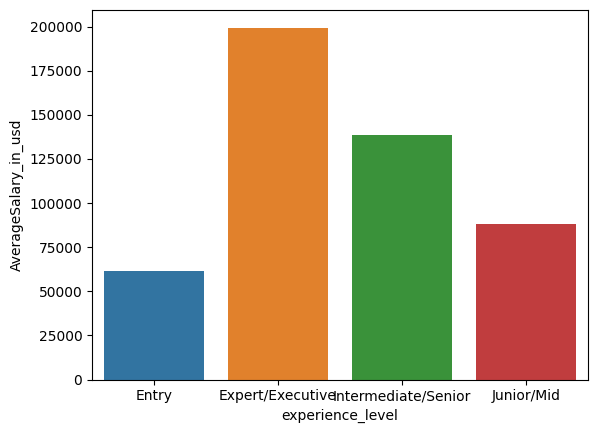

In [61]:
sns.barplot(data= salary_by_experience, x= 'experience_level',y= 'AverageSalary_in_usd')

* Expert / Executive have the steepest mean salary while entry level has the least

### 5c. Salary by Company Size

<AxesSubplot: xlabel='company_size', ylabel='salary_in_usd'>

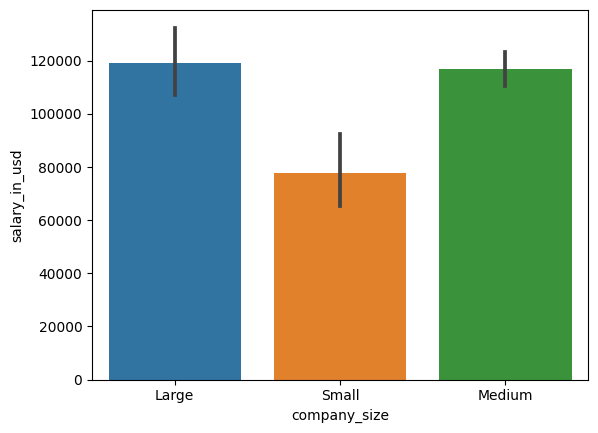

In [70]:
sns.barplot(x = "company_size", y = "salary_in_usd", data = df)

* The average salary in a large company is higher than that of a medium-sized company.
* We can also see that the highest outlier of 600,000 is paid by a large company, which is expected.

### 5d. Highest salaries by job title

<AxesSubplot: ylabel='job_title'>

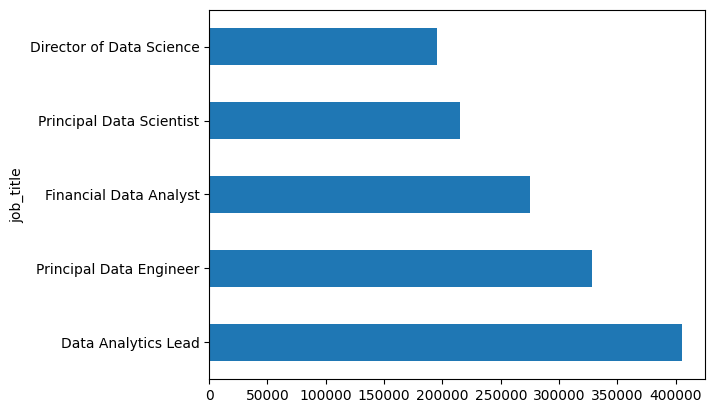

In [79]:
# Mean Salary Per Job Title
df.groupby(["job_title"])['salary_in_usd'].mean().sort_values(ascending=False).head().plot.barh()

In [ ]:
Data Scientist has the highest mean salaries, followed by Data Engineer and Data Analyst

### 5e. Average Salary by Company Location

<AxesSubplot: ylabel='company_location'>

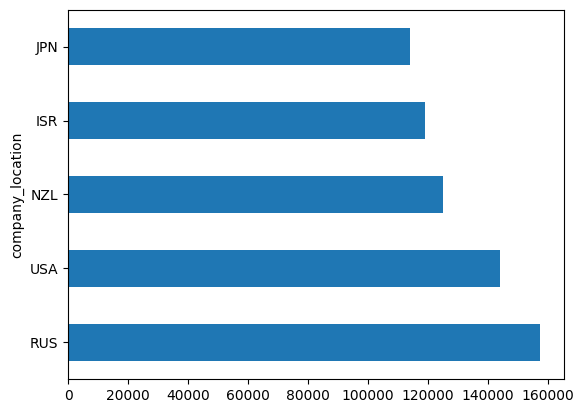

In [67]:
df.groupby(['company_location'])['salary_in_usd'].mean().sort_values(ascending=False).head().plot.barh()

* The top 5 average salaries by company location are Russia,United States,New Zealand,Israel and Japan.